# Introductie

Terrorisme is een wereldwijd probleem dat nog steeds actueel is en impact heeft op samenlevingen over de hele wereld. Terrorisme wordt gedefinieerd als het plegen van geweld vanuit ideologische motieven, specifiek gericht op het vermoorden van mensen en het ontwrichten van de maatschappij (Ministerie van Justitie en Veiligheid, 2023). Het doel is meestal om angst te zaaien en om een maatschappelijke of politieke verandering te veroorzaken. Vaak wordt er veel geweld gepleegd en raken er mensen gewond en komen zelfs te overlijden. Terrorisme zorgt voor internationale spanningen en kan de vrede aantasten. Ook kan een terroristische aanval voor trauma’s zorgen bij slachtoffers, daarom is het niet gek dat veel mensen bang zijn voor een volgende terroristische aanval. Het is daarom aan regeringen, organisaties en individuen de taak om terrorisme te bestrijden en voor een vreedzame oplossing te kiezen. 

In dit vak zullen we ons richten op het verkennen en begrijpen van terrorisme aan de hand van de Terrorisme dataset, waarbij we ons met name zullen focussen op specifieke dimensies. De Terrorisme dataset biedt ons een enorme hoeveelheid aan data die ons in staat stelt om het fenomeen terrorisme vanuit verschillende perspectieven te analyseren. We gebruiken in het onderzoek twee perspectieven. Het eerste perspectief is vanuit het standpunt dat terrorisme een groot probleem is en dat er meer geld en focus aan besteed moet worden. Het tweede perspectief is vanuit de beleving dat terrorisme de laatste jaren een veel minder grote rol is gaan spelen. De beide perspectieven staan lijnrecht tegenover elkaar. In dit onderzoek wordt er getoond wat de trend is van terrorisme vanaf het jaar 2000. Het laat zien of terrorisme is toegenomen, in welke landen dit het meeste speelt, hoeveel slachtoffers er vallen bij terrorisme en hoe groot de schade is bij een aanval. Het onderzoek laat zien in welke gebieden en landen de zwaarste aanvallen plaatsvinden. 

Een belangrijk doel van dit vak is het gebruik van visualisatietechnieken om de complexe gegevens in de Terrorisme dataset relatief simpel te visualiseren voor een breed publiek. Door middel van grafieken, kaarten en andere visuele representaties zullen we proberen patronen en trends in de data te ontdekken. Op die manier kunnen we beter begrijpen waar terroristische aanvallen vaker voorkomen en waarom bepaalde regio's meer getroffen worden dan andere en wat daarvoor de redenen zouden zijn. 



# Dataset and preprocessing

De dataset die gekozen was voor dit project heet ‘Global Terrorism Database’. Dit is een dataset waar alle terroristische aanslagen van de wereld in worden bijgehouden. Hierin worden vele variabelen per aanval nauwkeurig ingevoerd. Het was een relevante dataset tot en met 2017. 

De dataset geeft 135 verschillende variabelen over een tijdspanne van 47 jaar, namelijk van 1970 tot 2017. Dit is erg veel data. Deze hoeveelheid data is moeilijk om in te testen op een normale computer dus moest de dataset ‘preprocessed’ worden. Dit is een methode waarbij de dataset wordt ingeladen door middel van filteren. Specifieke rijen en kolommen werden uitgekozen voor de preprocessed dataset. 

De rijen in deze dataset stellen terroristische aanslagen voor. Op basis van een bepaalde variabelen konden wij bepalen met welke voorvallen wij wilden werken. We besloten om voornamelijk met jaartallen te werken. Om een dataset te krijgen die nog steeds relatief relevante informatie bevatte en snel kon inladen, hebben we besloten om de data van 2000 tot 2017 te gebruiken. De meest relevante data wordt hiermee dus gebruikt en er zijn genoeg jaren ervoor om correlaties en relaties uit te vinden. 

De kolommen waren representatief voor de variabelen in het bestand. De variabelen die interessant waren en meningen opbrachten zijn gekozen als variabelen voor het preprocessed bestand. Dit waren de volgende variabelen: eventid, iyear, country_txt, region_txt, nkill, propextent_txt, nwound en succes. 

Deze filteringen gaven een bestand dat snel kon inladen maar nog steeds veel data bevatte. De variabelen geven statistieken die belangrijk zijn en de terroristische voorvallen zijn verdeeld over 17 jaar waardoor er consistentie in de data gevonden kan worden. Dit is de code die gebruikt is om de gekozen dataset om te zetten in een preprocessed dataset: 



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename = "globalterrorismdb_0718dist.csv"

try:
    # Read the CSV file and select desired columns
    data = pd.read_csv(filename, usecols=["eventid","iyear", "imonth", "country_txt", "region_txt", "nkill", "propextent_txt", "natlty1_txt", "latitude", "longitude"], encoding="latin-1")

    # Filter rows based on the year condition
    data = data[data["iyear"] >= 2000]

    # Iterate over each row and print the selected columns
    for index, row in data.iterrows():
        eventid = row["eventid"]
        year = row["iyear"]
        month = row["imonth"]
        country = row["country_txt"]
        region = row["region_txt"]
        nkill = row["nkill"]
        propextent = row["propextent_txt"]
        natlty1 = row["natlty1_txt"]
        latitude = row["latitude"]
        longitude = row["longitude"]
         
except FileNotFoundError:
    print(f"Error: File '{filename}' not found.")
except IOError:
    print(f"Error: Could not open or read file '{filename}'.")

# Visualisatie 1

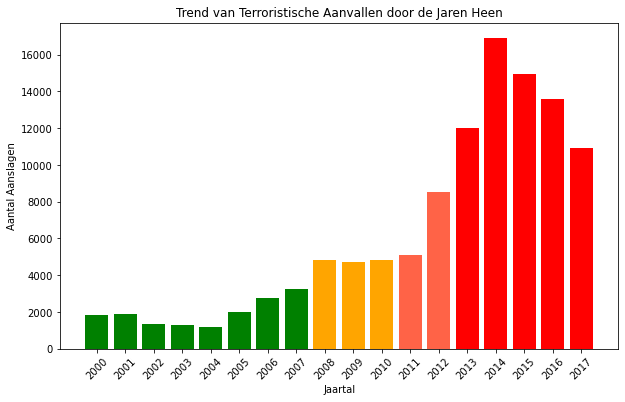

In [10]:
data = data[data["iyear"] >= 2000]

attack_counts = data["iyear"].value_counts().sort_index()

colors = []
for count in attack_counts.values:
    if count < 4000:
        colors.append('green')
    elif count < 5000:
        colors.append('orange')
    elif count < 9000:
        colors.append('tomato')
    else:
        colors.append('red')

plt.figure(figsize=(10, 6))
plt.bar(attack_counts.index, attack_counts.values, color=colors)
plt.xticks(attack_counts.index, rotation=45)

plt.xlabel("Jaartal")
plt.ylabel("Aantal Aanslagen")
plt.title("Trend van Terroristische Aanvallen door de Jaren Heen")
plt.show()

## Descriptie 1

In dit histogram wordt de trend van terroristische aanvallen door de jaren heen weergegeven. Het aantal aanslagen per jaar wordt weergegeven op de y-as, terwijl de jaartallen worden weergegeven op de x-as. Het histogram bestaat uit staafjes, waarbij elke staaf de frequentie van aanslagen vertegenwoordigt voor een specifiek jaar.

# Visualisatie 2

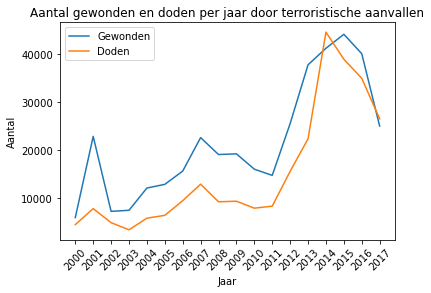

In [11]:
# Lees de dataset in een pandas DataFrame
dataset = pd.read_csv(filename, usecols=["iyear", "imonth", "country_txt", "region_txt", "nkill", "nwound", "propextent_txt", "natlty1_txt"], encoding="latin-1") 

dataset_filtered = dataset[(dataset['iyear'] >= 2000) & (dataset['iyear'] <= 2017)]
# Bereken het totale aantal gewonden en doden per jaar
aantal_gewonden_per_jaar = dataset_filtered.groupby('iyear')['nwound'].sum()
aantal_doden_per_jaar = dataset_filtered.groupby('iyear')['nkill'].sum()

# Maak het lijndiagram
fig, ax = plt.subplots()
ax.plot(aantal_gewonden_per_jaar.index, aantal_gewonden_per_jaar.values, label='Gewonden')
ax.plot(aantal_doden_per_jaar.index, aantal_doden_per_jaar.values, label='Doden')

# Stel de titel en labels in
ax.set_title('Aantal gewonden en doden per jaar door terroristische aanvallen')
ax.set_xlabel('Jaar')
ax.set_ylabel('Aantal')
ax.legend()

# Zet de x-as op jaarlijkse basis
ax.set_xticks(aantal_gewonden_per_jaar.index)
ax.set_xticklabels(aantal_gewonden_per_jaar.index, rotation=45)

# Toon het lijndiagram
plt.show()

## Descriptie 2

Visualisatie 2 is lijndiagram waar de trend te zien is van het aantal gewonden en doden bij een terroristische aanval per jaar vanaf 2000. Het aantal mensen dat gewond raakt of overlijdt tijdens een aanval wordt weergegeven op de y-as. De jaartallen staan vermeld op de x-as van dit lijndiagram. De blauwe laat het aantal gewonden per jaar zien en de oranje lijn laat het aantal doden zien.  

# Visualisatie 3

In [12]:
import plotly.graph_objs as go

filename = "globalterrorismdb_0718dist.csv"

# Lees de dataset in een pandas DataFrame
dataset = pd.read_csv(filename, usecols=["iyear", "imonth", "country_txt", "region_txt", "region", "nkill", "nwound", "propextent_txt", "natlty1_txt"], encoding="latin-1")

# Filter de gegevens met 'major' schade
dataset_major_schade = dataset[dataset['propextent_txt'] == 'Major (likely >= $1 million but < $1 billion)']

# Combineer "East Asia" en "Central Asia" in "Asia"
dataset_major_schade.loc[dataset_major_schade['region_txt'].isin(["East Asia", "Central Asia"]), 'region_txt'] = 'Asia'

# Bereken het percentage 'major' schade per land
percentage_per_land = dataset_major_schade['region_txt'].value_counts(normalize=True) * 100

# Maak het cirkeldiagram
fig = go.Figure(data=[go.Pie(labels=percentage_per_land.index, values=percentage_per_land)])

# Stel de titel in
fig.update_layout(
    title="Percentage 'major' schade per regio bij een aanval",
    width=800,  # Pas de breedte van het diagram aan
    height=600  # Pas de hoogte van het diagram aan
)

# Toon het cirkeldiagram
fig.show()


C:\Users\madsb\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Descriptie 3

Bij deze visualisatie worden alle regio’s met elkaar vergeleken op basis van de hoeveelheid ‘major’ schade die veroorzaakt is door terrorisme. ‘Major’ schade wordt gedefinieerd als schade die meer dan 1 miljoen euro heeft gekost om te herstellen.
Dit cirkeldiagram laat zien welke landen te maken hebben gehad met ‘major’ schade, weergegeven in percentages. 18.7% betekent dus dat van alle aanvallen die ‘major’ schade hebben veroorzaakt, er 18.7% in West-Europa hebben plaatsgevonden. 


# Visualisatie 4

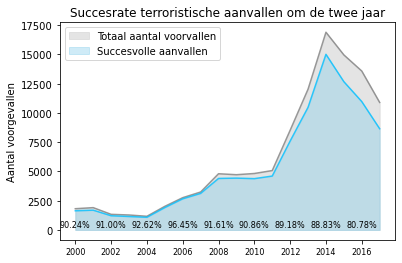

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

filename = "globalterrorismdb_0718dist.csv"

try:
    # Lees het CSV-bestand en selecteer de gewenste kolommen
    data = pd.read_csv(filename, usecols=["eventid", "iyear", "country_txt", "nkill", "propextent_txt", "natlty1_txt", "nwound", "success"], encoding="latin-1")

    # Filter de rijen op basis van de jaarconditie
    data = data[data["iyear"] >= 2000]

    # Bereken het totale aantal voorgevallen per jaar
    total_incidents_per_year = data["iyear"].value_counts().sort_index()

    # Bereken het aantal succesvolle voorgevallen per jaar
    successful_incidents_per_year = data[data["success"] == 1]["iyear"].value_counts().sort_index()

    # Bereken het succespercentage per jaar
    success_rate_per_year = (successful_incidents_per_year / total_incidents_per_year) * 100

    # Maak de area chart voor het totale aantal voorgevallen
    plt.fill_between(total_incidents_per_year.index, total_incidents_per_year, color="lightgrey", alpha=0.6, label="Totaal aantal voorvallen")
    plt.plot(total_incidents_per_year.index, total_incidents_per_year, color="grey", alpha=0.8)

    # Maak de area chart voor het aantal succesvolle voorgevallen
    plt.fill_between(successful_incidents_per_year.index, successful_incidents_per_year, color="skyblue", alpha=0.4, label="Succesvolle aanvallen")
    plt.plot(successful_incidents_per_year.index, successful_incidents_per_year, color="deepskyblue", alpha=0.8)

    # Geef de y-as een label
    plt.ylabel("Aantal voorgevallen")

    # Voeg de percentages toe
    for i, percentage in enumerate(success_rate_per_year.values):
        if i % 2 == 0:
            plt.annotate(f"{percentage:.2f}%", (success_rate_per_year.index[i], percentage), ha="center", va="bottom", fontsize=8)

    # Pas de x-as labels aan
    x_ticks = range(2000, 2018, 2)
    plt.xticks(x_ticks, fontsize=8)

    # Voeg een legenda toe
    plt.legend()

    # Voeg de titel toe
    plt.title("Succesrate terroristische aanvallen om de twee jaar")

    # Toon de grafiek
    plt.show()

except FileNotFoundError:
    print(f"Fout: Bestand '{filename}' niet gevonden.")
except IOError:
    print(f"Fout: Kon bestand '{filename}' niet openen of lezen.")


## Descriptie 4

Visualisatie 4 is een gebiedsgrafiek. In deze grafiek worden 2 variabelen vergeleken: Het totaal aantal voorgevallen van terrorisme aanvallen per jaar en de ‘succes’ van de aanvallen. Een aanval wordt vaak gepland met een doel. Succes staat voor de waarde die aangeeft of de echte aanval ook echt is gegaan zoals het gepland was. Het grijze gebied geeft alle aanvallen over de jaren weer, het blauwe gebied geeft alle succesvolle aanvallen aan. Onderin staan de jaartallen weergeven en daar net boven staan de succespercentages van om de twee jaar. 

# Visualisatie 5

In [19]:
import pandas as pd
import plotly.express as px

# Lees de dataset in een pandas DataFrame
data = pd.read_csv(filename, usecols=["eventid", "iyear", "imonth", "country_txt", "region_txt", "nkill", "propextent_txt", "natlty1_txt"], encoding="latin-1")

# Filter rows based on the year condition
data = data[data["iyear"] >= 2000]

# Groepeer de gegevens per land en bereken het totale aantal gebeurtenissen en het aantal slachtoffers per land
land_gebeurtenissen = data.groupby('country_txt').size().reset_index(name='aantal_gebeurtenissen')
land_slachtoffers = data.groupby('country_txt')['nkill'].sum().reset_index(name='aantal_slachtoffers')

# Voeg de gegevens van het totale aantal gebeurtenissen en slachtoffers samen
landen_data = pd.merge(land_gebeurtenissen, land_slachtoffers, on='country_txt')

# Maak een choropleth-kaart met een aangepaste kleurschaal
fig = px.choropleth(landen_data, locations='country_txt', locationmode='country names', color='aantal_gebeurtenissen',
                    hover_data=['country_txt', 'aantal_gebeurtenissen', 'aantal_slachtoffers'],
                    title='Geografische spreiding van terrorisme-incidenten',
                    color_continuous_scale='YlOrRd')  # Verander de kleurschaal naar YlOrRd voor hoger contrast

fig.show()

## Descriptie 5

Visualisatie 5 is een heatmap van de wereld, waarbij de landen worden gekleurd naar het aantal terroristische aanvallen dat het land kent sinds het jaar 2000. De donkere landen kennen meerdere aanvallen, terwijl de lichtere landen minder aanvallen kennen. Het land met de meeste terroristische aanvallen in de wereld is Iran, gevolgd door Afghanistan, Pakistan en India. De overige landen liggen allemaal relatief dicht bij elkaar met het aantal aanvallen. 

# Perspectief 1: Er moet meer tijd en geld besteed worden om terrorisme te stoppen

## Argument 1

Zoals in visualisatie 1 te zien is neemt het aantal aanslagen sinds 2011 sterk toe, dit zal kunnen leiden tot toenemende maatschappelijke onrust: Een stijging in het aantal aanslagen kan leiden tot groeiende onrust en instabiliteit in de samenleving. Aanslagen zaaien angst en onzekerheid, wat kan leiden tot verdeeldheid tussen mensen. Het is van groot belang om de onderliggende oorzaken en factoren van deze trend te begrijpen, zodat we maatregelen kunnen nemen om de maatschappelijke onrust tegen te gaan en het aantal aanslagen te verminderen.

## Argument 2

In visualisatie 3 is te zien dat terrorisme een wereldwijd probleem is, met de hoogste percentages van ‘major’ schade in Zuid Amerika, West Europa en het Midden Oosten & Noord Afrika. Uit de hoge percentages in gebieden zoals West Europa en Zuid Amerika is af te leiden dat ook ontwikkelde landen met geavanceerde veiligheidsmaatregelen kwetsbaar zijn voor terrorisme. Er moet daarom dringend worden gezocht naar een manier om terrorisme te bestrijden. Overheden en internationale organisaties moeten samenwerken om terrorisme tegen te gaan, zodat de schade zoveel mogelijk beperkt blijft. 

# Perspectief 2: Er moet minder/evenveel tijd en geld besteed worden aan terrorisme stoppen

## Argument 1

In het lijndiagram van visualisatie 2 is te zien dat er een piek was van het aantal doden en gewonden door een terroristische aanval tussen 2013 en 2015. De stijging van doden en gewonden is vanaf 2011 sterk toegenomen, daarnaast is er een sterke daling te zien van 2015 tot 2017. Terroristische aanvallen zijn de laatste jaren verminderd en er vallen minder gewonden en doden. Hierdoor is het niet nodig om meer geld te besteden om terrorisme te stoppen. De dalende trend is al ingezet en de wereldvrede is stabiel, waardoor extra moeite en geld tegen de bestrijding van terrorisme op dit moment overbodig is.

## Argument 2

In visualisatie 4 is te zien dat tussen het jaar 2014 en het jaar 2017 zowel het totaal aantal terroristische aanslagen, als het aantal succesvolle terroristische aanslagen is teruggedrongen. Ook neemt het succespercentage succesvolle aanslagen vanaf het jaar 2007 continu af. Uit deze dalende trend van terroristische aanslagen en het afnemende succespercentage kan geconcludeerd worden dat het treffen van extra veiligheidsmaatregelen tegen terrorisme niet noodzakelijk is. Er zijn op dit moment voldoende maatregelen die zo goed mogelijk voorkomen dat terroristische aanslagen plaatsvinden.

## Argument 3

In visualisatie 5 is te zien dat het land Iran de meeste terroristische aanvallen heeft gehad. Ook valt op dat er maar enkele landen die echt boven de rest uitstijgen qua aanvallen. Vanuit een westers perspectief ziet het er rustig uit in het Westen. De meeste aanvallen gebeuren in het Midden-Oosten en in het westen van Azië. Het is daarom niet nodig om extra geld uit te geven vanuit het westen, omdat de aanvallen daar relatief meevallen. Het zou overbodig zijn om meer geld uit te geven aan een probleem dat relatief minder speelt in het Westen.  

# Appendix

Generative AI usage: ChatGPT met GPT 3.5

In which parts is AI used: Visualisaties 1, 2, 3 en 4. 

Reasons of usage: Helpen bij het schrijven en het debuggen van de code voor de visualisatie

The prompts that were used: Rewrite and debug this code for a histogram

## Referenties

Ministerie van Justitie en Veiligheid. (2023, 31 januari). Definities gebruikt in het Dreigingsbeeld Terrorisme Nederland. Dreigingsbeeld Terrorisme Nederland | Nationaal Coördinator Terrorismebestrijding en Veiligheid. https://www.nctv.nl/onderwerpen/dtn/definities-gebruikt-in-het-dtn